In [527]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from warnings import filterwarnings, filters
filterwarnings('ignore')


# Nigeria Economic Analysis (1999–2018)
Since Nigeria's return to democracy in 1999, its economy has been shaped by global oil prices, policy decisions, and governance styles under two main political parties: the People's Democratic Party (PDP) and the All Progressives Congress (APC).
Under PDP (1999–2015), the economy experienced relative growth, driven by debt relief, privatization, and a booming oil sector. Obasanjo's reforms and Jonathan's economic liberalization helped grow GDP, but inflation remained a recurring challenge, especially during oil price shocks.
Under APC (2015–present), the economy has been marked by recession (2016, 2020), currency devaluation, rising inflation, and controversial policies like border closures and subsidy removals. While reforms under Buhari and Tinubu aim for long-term stability, inflation has surged amid economic adjustments.
This project will analyze how both administrations influenced Nigeria's inflation rate using statistical and time series methods, providing insights into policy impacts over time.
## 📁 Features

- Time-series modeling using **ARIMA/SARIMAX**
- Statistical tests (t-tests) for administrative comparisons
- Forecasting inflation and GDP trends
- Visualization of economic sector contributions (Agriculture, Industry, Services)
- Correlation and autocorrelation analysis
- Clean and reproducible code with documented findings

## Introduction To Dataset
| Name              | Description                                        |
|-------------------|----------------------------------------------------|
| Inflation rate    | Annual percentage change in consumer prices       |
| Unemployment      | Percentage of the labor force without jobs        |
| Government debt   | Total public debt as a percentage of GDP          |
| Agriculture       | GDP contribution from the agricultural sector     |
| Industry          | GDP contribution from the industrial sector       |
| Services          | GDP contribution from the services sector         |
| GDP (Basic Prices)| GDP at 2010 constant basic prices (excluding taxes)|
| Net Taxes         | Taxes on products net of subsidies                |
| GDP (Market Prices)| GDP at 2010 constant market prices (includes taxes)|

## Data Collection

In [528]:
econ_df = pd.read_excel("Nigeria Economy.xlsx",sheet_name="Nigeria Economy",index_col='Year',parse_dates=True)

In [529]:
econ_df.head()

,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
Year,,,,,,,,,
1990-01-01,0.0740,0.056,0.717,3464.72,11148.10,6849.92,21462.73,217.47,21680.20
1991-01-01,0.1301,0.041,0.750,3590.84,10910.56,7038.21,21539.61,218.28,21757.90
1992-01-01,0.4460,0.041,0.702,3674.79,11578.98,7283.32,22537.10,228.45,22765.55
1993-01-01,0.5720,0.041,0.710,3743.67,10790.31,7544.10,22078.07,224.17,22302.24
1994-01-01,0.5703,0.041,0.559,3839.68,10151.70,7685.48,21676.85,220.62,21897.47


In [530]:
econ_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 1990-01-01 to 2023-01-01
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Inflation rate                      34 non-null     float64
 1   Unemployment                        34 non-null     float64
 2   Government debt                     34 non-null     float64
 3   Agriculture                         34 non-null     float64
 4   Industry                            34 non-null     float64
 5   Services                            34 non-null     float64
 6   GDP at 2010 Constant Basic Prices   34 non-null     float64
 7   NetTaxesOnProducts                  34 non-null     float64
 8   GDP at 2010 Constant Market Prices  34 non-null     float64
dtypes: float64(9)
memory usage: 2.7 KB


The economic dataset is successfully loaded into a Pandas DataFrame with the following characteristics:

* Type: pandas.core.frame.DataFrame

* with about 34 annual entries ranging from 1990 to 2023

* Columns: 9 numerical features representing key macroeconomic indicators

* Non-null entries: All columns are complete (no missing data)

* Data Types: All columns are of type float64, suitable for quantitative and statistical analysis

In [531]:
economic_data =econ_df.loc['1999':]

In [532]:
econ_df.columns

Index(['Inflation rate', 'Unemployment', 'Government debt', 'Agriculture',
       'Industry', 'Services', 'GDP at 2010 Constant Basic Prices',
       'NetTaxesOnProducts', 'GDP at 2010 Constant Market Prices'],
      dtype='object')

In [ ]:

economic_data['year']= economic_data.index.year

To maintain political and economic coherence, the analysis is limited to Nigeria's democratic era, beginning in 1999 with the transition from military to civilian rule. By slicing the dataset accordingly, we focus the investigation on economic trends, policies, and impacts under democratic administrations (PDP and APC), ensuring relevance to governance-related comparisons.

In [599]:
# Define a function to classify the political administration based on the year
def administration_type(year):
    # If the year is before 2015, it was during the PDP administration
    if int(year) < 2015:
        return 'PDP administration'
    else:
        # From 2015 onwards, the APC administration took over
        return 'APC administration'

# Apply the function to the 'year' column of the economic_data DataFrame
# and create a new column called 'Administration' with the result
economic_data['Administration'] = economic_data['year'].apply(administration_type)

,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices,year,Administration
Year,,,,,,,,,,,
1999-01-01,0.066,0.0400,0.649,4703.64,10201.81,9062.14,23967.59,248.18,24215.78,1999,PDP administration
2000-01-01,0.069,0.0400,0.576,4840.97,10962.84,9365.72,25169.54,260.88,25430.42,2000,PDP administration
2001-01-01,0.189,0.0390,0.531,5024.54,11576.32,10057.76,26658.62,276.69,26935.32,2001,PDP administration
2002-01-01,0.129,0.0390,0.433,7817.08,11725.42,11202.68,30745.19,319.08,31064.27,2002,PDP administration
2003-01-01,0.140,0.0390,0.421,8364.83,13151.23,11488.74,33004.80,341.83,33346.62,2003,PDP administration
2004-01-01,0.150,0.0390,0.355,8888.57,13382.86,13786.30,36057.74,373.64,36431.37,2004,PDP administration
2005-01-01,0.179,0.0390,0.189,9516.99,13609.76,15252.04,38378.80,398.22,38777.01,2005,PDP administration
2006-01-01,0.082,0.0390,0.094,10222.47,13342.47,17138.74,40703.68,423.00,41126.68,2006,PDP administration
2007-01-01,0.054,0.0380,0.081,10958.47,13085.27,19342.14,43385.88,451.51,43837.39,2007,PDP administration


In [ ]:
## Data Exploration

In [ ]:
def linplot(col,title,legend_loc):  # Optional: Set figure size
    sns.lineplot(data = economic_data, x= economic_data.index, y= col, hue='Administration')
    plt.title(title)
    plt.legend(loc= legend_loc)
  

### Inflation Rate Trends in Nigeria (1999–2023)

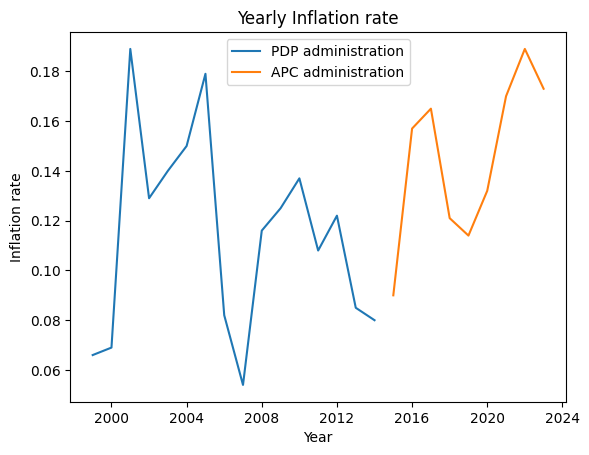

In [ ]:

linplot('Inflation rate', "Yearly Inflation rate",'upper center')


The yearly inflation rate chart reveals a dynamic but generally upward trend in consumer prices over Nigeria’s democratic era.

* Under the PDP administration (1999–2014), inflation was relatively volatile but somewhat contained, with periodic spikes likely driven by subsidy removals, global oil price shocks, and currency pressures. Despite these fluctuations, the rate showed moments of stabilization during the mid-2000s.

* From 2015 onward, under the APC administration, inflation accelerated significantly—especially during the 2016 recession and following the COVID-19 pandemic. Structural weaknesses, border closures, naira devaluation, and rising food and energy costs drove inflation to persistently high levels, often in double digits.

Overall, the chart underscores inflation as a persistent economic challenge across administrations, with sharper escalations observed in more recent years

###  Government Debt Trajectory in Nigeria (1999–2023)

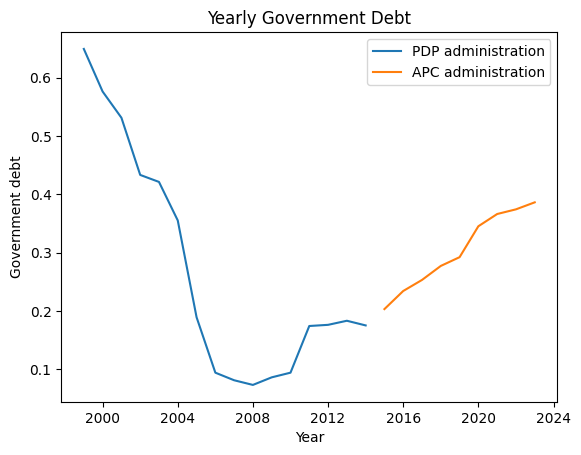

In [538]:
linplot('Government debt',"Yearly Government Debt",'upper right')

The government debt chart paints a clear picture of Nigeria’s rising public debt burden over its democratic period, with a dramatic upturn in recent years.

* During the PDP era (1999–2014), debt levels were relatively modest and even declined in the mid-2000s—thanks in part to the 2005 Paris Club debt relief initiative and prudent fiscal consolidation. For much of this period, public borrowing was kept in check despite challenges in oil revenue volatility.

* From 2015 onward under the APC administration, the debt curve steepened considerably. Facing multiple economic shocks—including the 2016 oil crisis, the COVID-19 pandemic, and increased fiscal deficits—the government resorted to aggressive domestic and external borrowing. This led to a significant surge in public debt, raising concerns over debt sustainability and the cost of servicing.

The chart underscores a shift from relatively conservative borrowing to a more debt-financed fiscal approach, especially in response to external pressures and domestic revenue constraints.

### GDP Trend

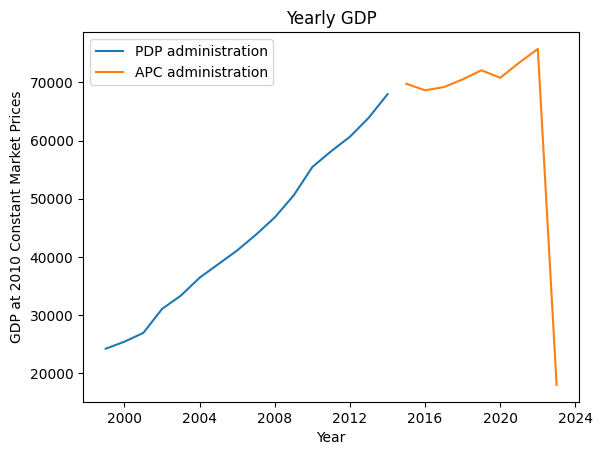

In [539]:
linplot('GDP at 2010 Constant Market Prices', 'Yearly GDP','upper left')

Nigeria’s GDP trend reflects a story of early expansion, mid-period resilience, and more recent economic challenges.

Under the PDP administration (1999–2014), the economy experienced steady and sometimes robust growth, buoyed by rising oil prices, telecom liberalization, banking sector reforms, and increased foreign investment. This period marked the structural transformation of the economy, culminating in the 2014 GDP rebasing, which revealed a more diversified and larger economic base than previously captured.

During the APC era (2015–2023), growth momentum slowed significantly. The economy slipped into recession twice—first in 2016 due to the global oil price crash, and again in 2020 following the COVID-19 pandemic. A sharp drop appears at the chart's edge for 2023 - likely due to a data anomaly or incomplete reporting - but it visually underscores growing concern over Nigeria's economic fragility.
e.

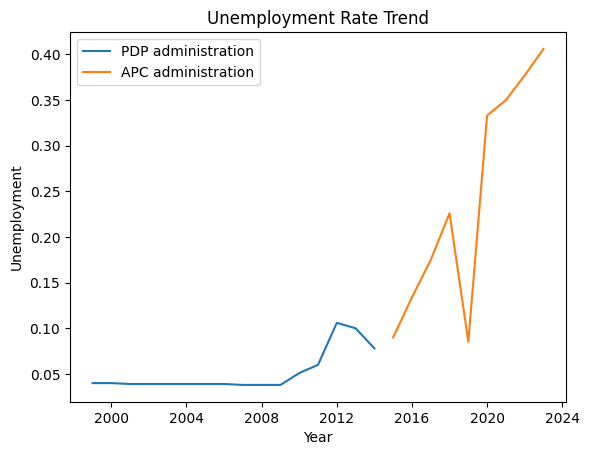

In [540]:
linplot('Unemployment', 'Unemployment Rate Trend','upper left')

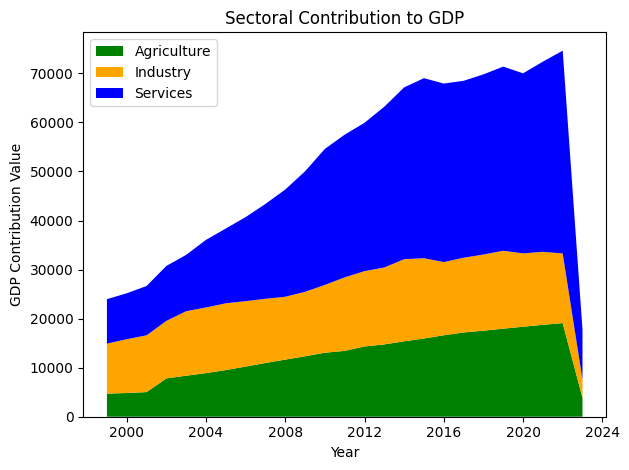

In [541]:
plt.stackplot(economic_data.index, economic_data['Agriculture'],economic_data['Industry'],economic_data['Services'],labels=['Agriculture','Industry','Services'],colors=['green','orange','blue'])
plt.xlabel("Year")
plt.ylabel("GDP Contribution Value")
plt.title('Sectoral Contribution to GDP')

plt.legend()
plt.tight_layout()

## Statistical Analysis

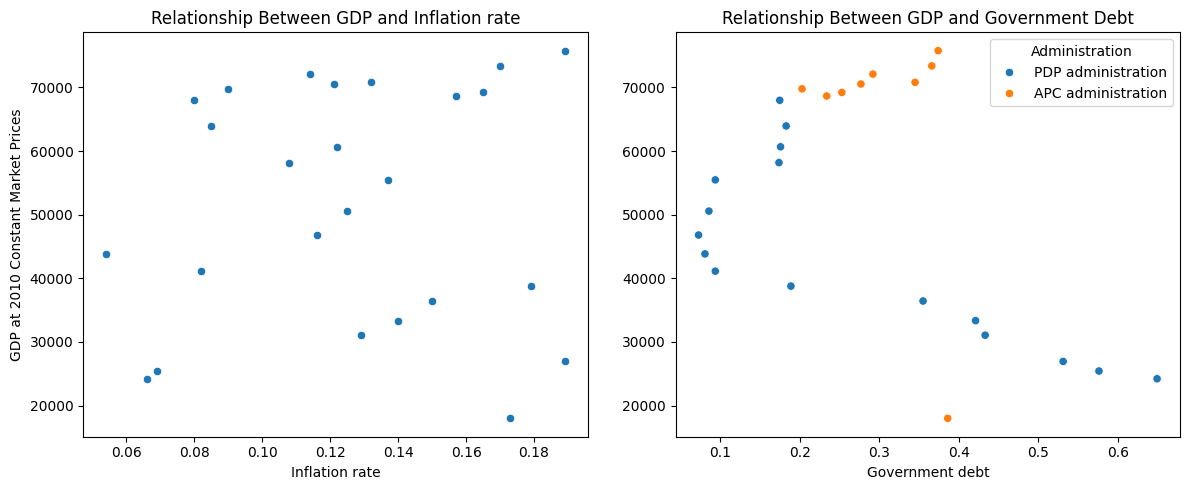

In [542]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(data=economic_data, x='Inflation rate', y='GDP at 2010 Constant Market Prices',ax=axes[0])
axes[0].set_title('Relationship Between GDP and Inflation rate')
sns.scatterplot(data=economic_data, x='Government debt', y='GDP at 2010 Constant Market Prices', hue='Administration',ax=axes[1])
axes[1].set_ylabel(" ")
axes[1].set_title('Relationship Between GDP and Government Debt')

plt.tight_layout()
plt.show()

The left scatterplot shows no clear linear relationship between GDP and inflation rate.
The right scatterplot reveals a clearer inverse trend: as government debt rises, GDP tends to stagnate or decline.

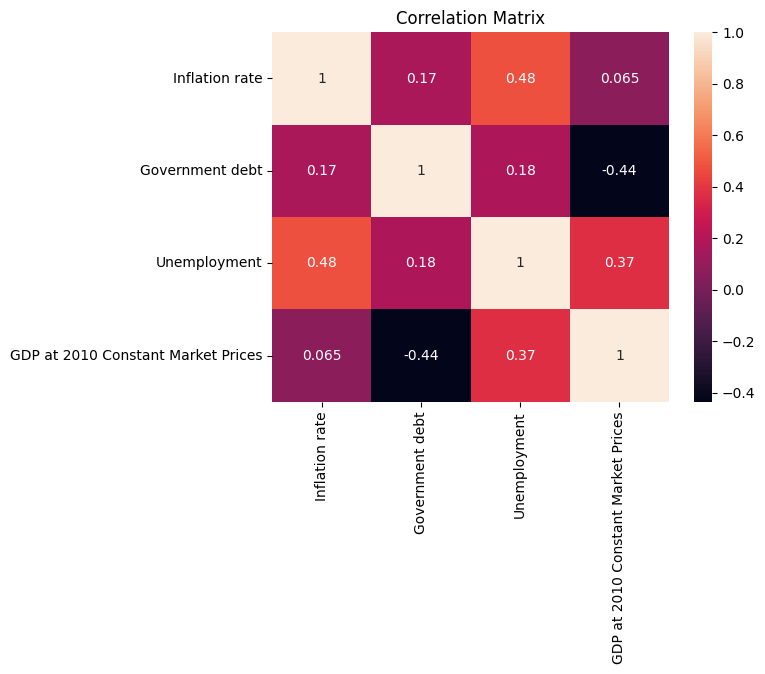

In [543]:
ax=sns.heatmap(economic_data[['Inflation rate','Government debt','Unemployment', 'GDP at 2010 Constant Market Prices']].corr(),annot=True)
ax.set_title('Correlation Matrix')
plt.show()


A correlation analysis of Nigeria's key economic indicators reveals some surprising dynamics:
* Inflation vs. GDP: Virtually no relationship (0.07), suggesting that rising prices have little direct impact on economic growth.
* Government Debt vs. GDP: A moderate negative correlation (-0.44) indicates that increased borrowing has been associated with declining output - pointing to concerns over unproductive debt.
* Unemployment vs. GDP: A moderate positive correlation (0.37) suggests jobless growth - the economy is expanding, but jobs aren't being created proportionally.
* Inflation vs. Unemployment: A strong positive correlation (0.48) - a worrying sign of stagflation, where high inflation coexists with high joblessness.

In [544]:
from scipy.stats import ttest_ind, ttest_rel

In [546]:
economic_data['Administration'].unique()

array(['PDP administration', 'APC administration'], dtype=object)

In [616]:
pdp_inf = economic_data[economic_data['Administration']=='PDP administration']['Inflation rate']
apc_inf = economic_data[economic_data['Administration']=='APC administration']['Inflation rate']

### Check the statistical relationship between administration and Inflation rate

In [643]:

## This function performs an independent two-sample t-test (Welch’s t-test) to determine whether there is a statistically significant difference between the means of two independent data samples—typically used to compare metrics (like inflation, debt, etc.) under different conditions (e.g., political administrations)

def ttest_dep(series1, series2, null_text="There is no statistical significant diffrence in the inflation rate across different administration type",
              alt_text="There is statistical significant difference in the inflation rate across different administration type", alpha=0.05):
    result = ttest_ind(series1, series2, equal_var=False)
    print("TTest statistic: {:.4f}".format(result.statistic))
    print("p-value: {:.4f}".format(result.pvalue))
    
    if result.pvalue <= alpha:
        print(alt_text)
    else:
        print(null_text)

In [644]:
ttest_dep(pdp_inf,apc_inf,)


TTest statistic: -2.1121
p-value: 0.0477
There is statistical significant difference in the inflation rate across different administration type


In [550]:
inf_df=economic_data.groupby('Administration').agg({"Inflation rate":'mean'})

In [551]:
inf_df

,Inflation rate
Administration,
APC administration,0.145667
PDP administration,0.114437


In [627]:
def plot_barchart(df, x, y, hue,title,ylabel):
    ax=sns.barplot(data=df,x=x, y=y, hue=hue)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    plt.show()

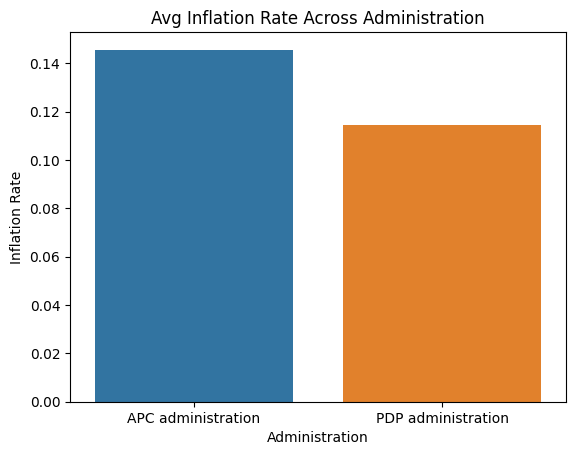

In [628]:
plot_barchart(inf_df,inf_df.index,'Inflation rate',inf_df.index,'Avg Inflation Rate Across Administration','Inflation Rate')

Since the p-value is less than 0.05, the result is statistically significant - indicating that the difference in inflation rates between the two administrations is not due to random chance.

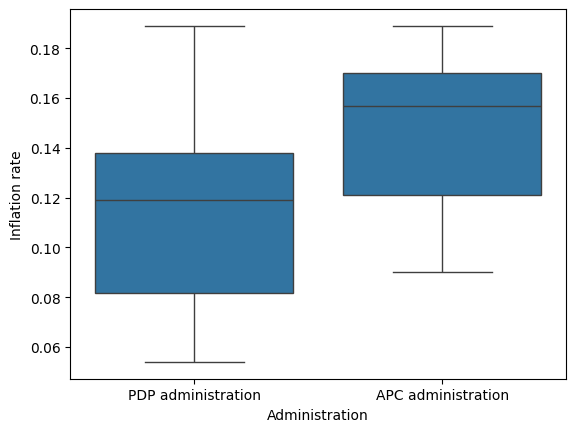

In [633]:
sns.boxplot(data=economic_data, x='Administration',y='Inflation rate')
plt.show()

### Check the statistical relationship between administration and Government debt

In [554]:
pdp_debt = economic_data[economic_data['Administration']=='PDP administration']['Government debt']
apc_debt = economic_data[economic_data['Administration']=='APC administration']['Government debt']


In [645]:
ttest_dep(pdp_debt,apc_debt)

TTest statistic: -0.6554
p-value: 0.5196
There is no statistical significant diffrence in the inflation rate across different administration type


Since the p-value is greater than 0.05, the result is statistically insignificant

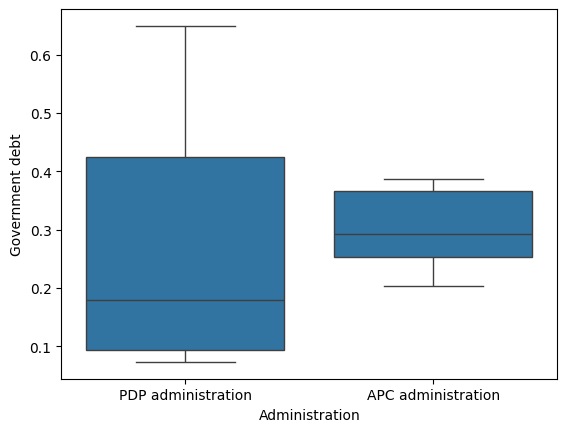

In [641]:
sns.boxplot(data=economic_data, x='Administration', y='Government debt')
plt.show()


While the median government debt appears higher under APC, the average debt difference is not statistically significant -This suggests that administrative change alone may not explain variations in inflation, and other macroeconomic or external factors likely play a more dominant role.

In [558]:
debt_df=economic_data.groupby('Administration').agg({"Government debt":'mean'})
debt_df

,Government debt
Administration,
APC administration,0.303333
PDP administration,0.268125


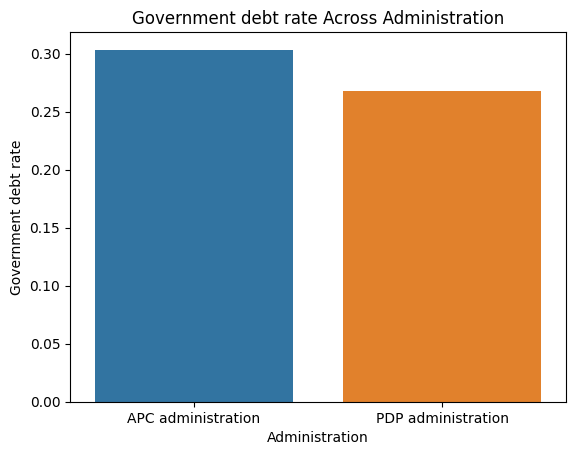

In [647]:
plot_barchart(df=debt_df,x=debt_df.index,y='Government debt',hue=inf_df.index,title="Government debt rate Across Administration",ylabel='Government debt rate')

### Check the statistical relationship between administration and GDP

In [648]:
pdp_gdp = economic_data[economic_data['Administration']=='PDP administration']['GDP at 2010 Constant Basic Prices']
apc_gdp = economic_data[economic_data['Administration']=='APC administration']['GDP at 2010 Constant Basic Prices']

In [560]:
ttest_dep(pdp_gdp,apc_gdp)

TTest: -3.067561965404047
p. value 0.008507456720762962
There is statistical significant difference in the inflation rate across different administration type


In [ ]:
#find the average gdp of each administration type
gdp_df=economic_data.groupby('Administration').agg({"GDP at 2010 Constant Basic Prices":'mean'})

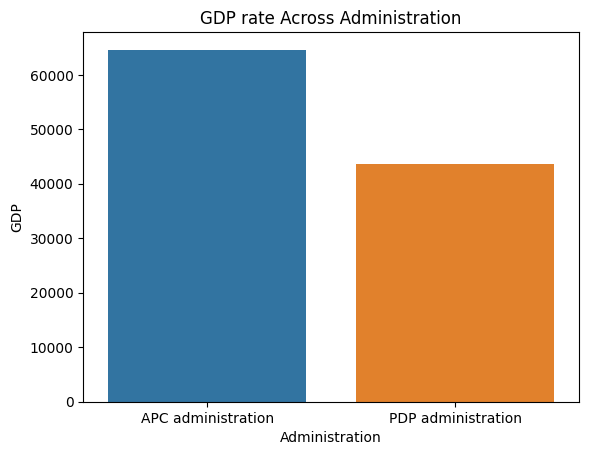

In [653]:
plot_barchart(df=gdp_df,x=gdp_df.index, y='GDP at 2010 Constant Basic Prices',title="GDP rate Across Administration",hue=gdp_df.index,ylabel='GDP')

### Check the statistical relationship between administration and Unemployment Rate

In [563]:
pdp_unemp = economic_data[economic_data['Administration']=='PDP administration']['Unemployment']
apc_unemp = economic_data[economic_data['Administration']=='APC administration']['Unemployment']

In [654]:
ttest_dep(pdp_unemp,apc_unemp)

TTest statistic: -4.4548
p-value: 0.0019
There is statistical significant difference in the inflation rate across different administration type


<Axes: xlabel='Administration', ylabel='Unemployment'>

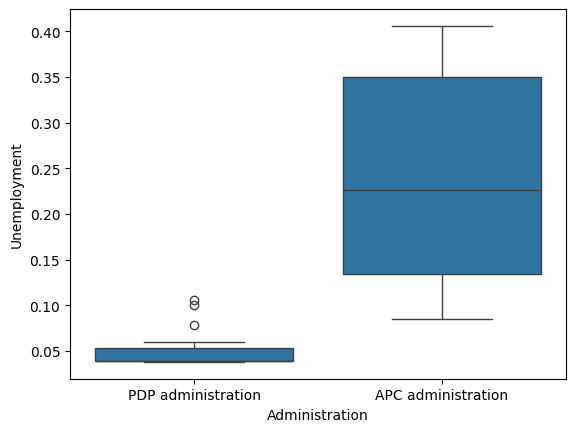

In [565]:
sns.boxplot(data=economic_data, x='Administration', y='Unemployment')

In [566]:
unemp_df=economic_data.groupby('Administration').agg({"Unemployment":'mean'})

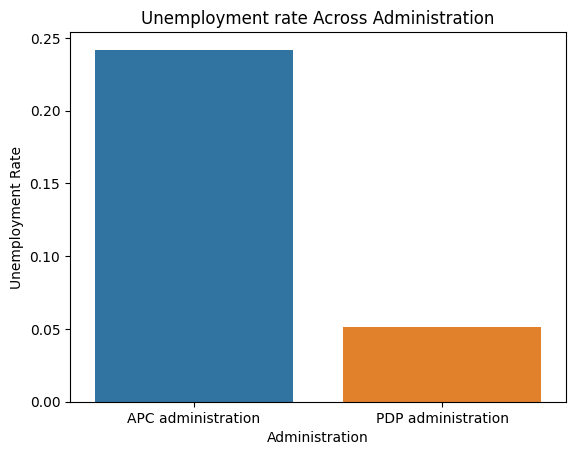

In [655]:
plot_barchart(df=unemp_df,x=unemp_df.index,y='Unemployment', hue=unemp_df.index,title='Unemployment rate Across Administration',ylabel='Unemployment Rate')

A recent statistical analysis has revealed a stark contrast in unemployment rates between Nigeria's two dominant political administrations. The results of a T-test comparing average unemployment under the PDP and APC governments show a statistically significant difference, with a p-value of 0.0019 and a T-statistic of -4.45.

In [568]:
## Forcasting


In [569]:
from statsmodels.tsa.stattools import adfuller

In [663]:
def adf_test(series,alpha=0.05,alt_text='Strong evidence against the null hypothesis, reject the null hypothesis. Data does not have  unit root and is stationary',null_text='Weak evidence against the null hypothesis, the time series has a unit root. indicating it is non-stationary'):
    result = adfuller(series)
    print("ADF Statistics: {:.4f}".format(result[0]))
    print('p. value: {: .4f}'.format(result[1]))
    if result[1] <= alpha:
        print(alt_text)
    else:
        print(null_text)

In [664]:
adf_test(economic_data['Inflation rate'])

ADF Statistics: -3.2945
p. value:  0.0151
Strong evidence against the null hypothesis, reject the null hypothesis. Data does not have  unit root and is stationary


Since the p-value is less than 0.05, we reject the null hypothesis that the inflation rate series has a unit root. This indicates that the inflation rate is stationary, meaning its statistical properties—such as mean and variance—remain constant over time.

This is particularly important for time series modeling, as stationarity is a core assumption for ARIMA models. Given that the inflation rate is already stationary, we can proceed to fit an **ARIMA model without needing differencing (i.e., setting the differencing order d = 0).

In [665]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Plot the ACF and PACF to detemine the value of p and q in the ARIMA model.

In [666]:
def plot_acf_pacfchart(col):
    fig , axes = plt.subplots(1, 2, figsize=(10,4))
    plot_acf(col,lags=10,ax=axes[0])
    axes[0].set_title("Plot ACF plot for q")

    plot_pacf(col,lags=10,ax=axes[1])
    axes[1].set_title("Plot PACF plot for p")

    plt.tight_layout()
    plt.show()


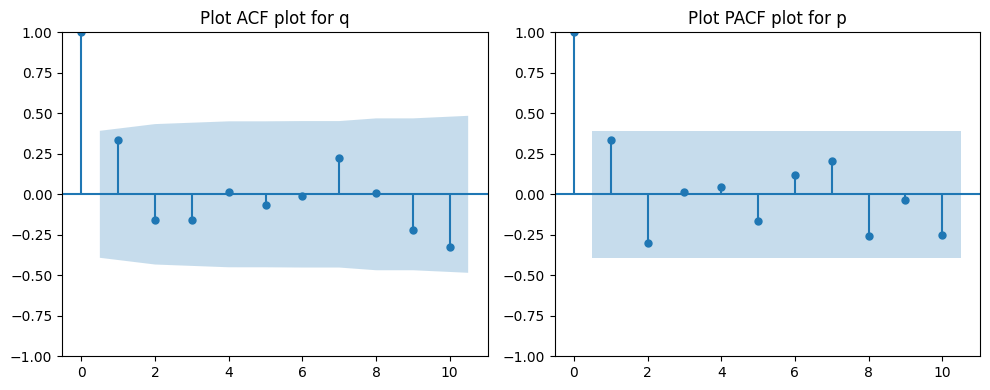

In [667]:
plot_acf_pacfchart(economic_data['Inflation rate'])

The above chart hints at p=1 and q=1

In [668]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error

In [ ]:
### Split Data 
train_data_size = int(len(economic_data) * 0.8)
train_data, test_data = economic_data['Inflation rate'][:train_data_size], economic_data['Inflation rate'][train_data_size:]

In [670]:
arima_model = ARIMA(train_data,order=(1,0,1))

In [671]:
arima_model_fit = arima_model.fit()

In [672]:
test_pred = arima_model_fit.forecast(steps=len(test_data))

In [673]:
mse= mean_squared_error(test_data,test_pred)
mse

0.0022002167339072133

In [674]:
rmse = root_mean_squared_error(test_data,test_pred)
rmse

0.046906467932548636

In [581]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Inflation rate   No. Observations:                   20
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  38.066
Date:                Wed, 28 May 2025   AIC                            -68.132
Time:                        15:37:20   BIC                            -64.150
Sample:                    01-01-1999   HQIC                           -67.355
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1179      0.010     11.249      0.000       0.097       0.138
ar.L1         -0.1606      0.730     -0.220      0.826      -1.592       1.271
ma.L1          0.4598      0.655      0.702      0.482      -0.823       1.743
sigma2         0.0013      0.001      2.239      0.025       0.000       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.93   Prob(JB):                         0.65
Heteroskedasticity (H):               0.39   Skew:                             0.37
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Carry out complete forcasting

In [582]:
complete_arima_model = ARIMA(economic_data['Inflation rate'],order=(1,0,1))
complete_arima_model_fit = complete_arima_model.fit()

In [583]:
forecast = complete_arima_model_fit.forecast(steps=4)

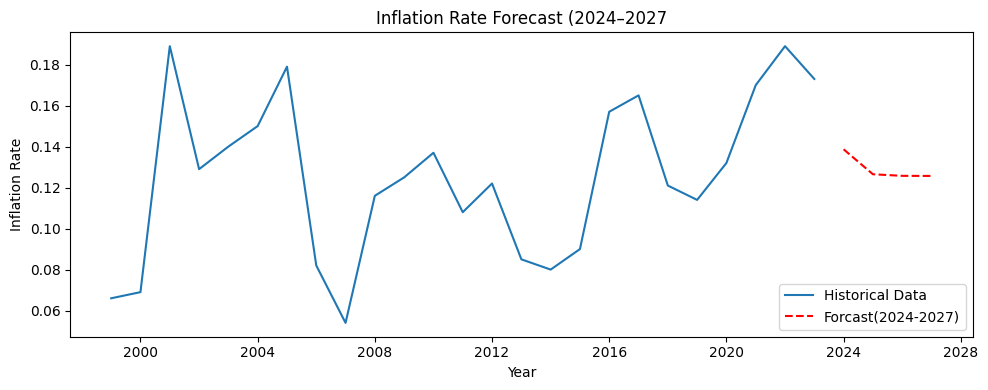

In [584]:
plt.figure(figsize=(10,4))
plt.plot(economic_data.index,economic_data['Inflation rate'], label='Historical Data')
plt.plot(forecast.index, forecast.values, label='Forcast(2024-2027)',color='red',ls ='--')

plt.title('Inflation Rate Forecast (2024–2027')
plt.ylabel("Inflation Rate")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

In [585]:
adf_test(economic_data['GDP at 2010 Constant Basic Prices'])

ADF Statistics: -1.6111523487584534
p. value 0.47737072223638755
Weak evidence against the null hypothesis, the time series has a unit root. indicating it is non-stationary 


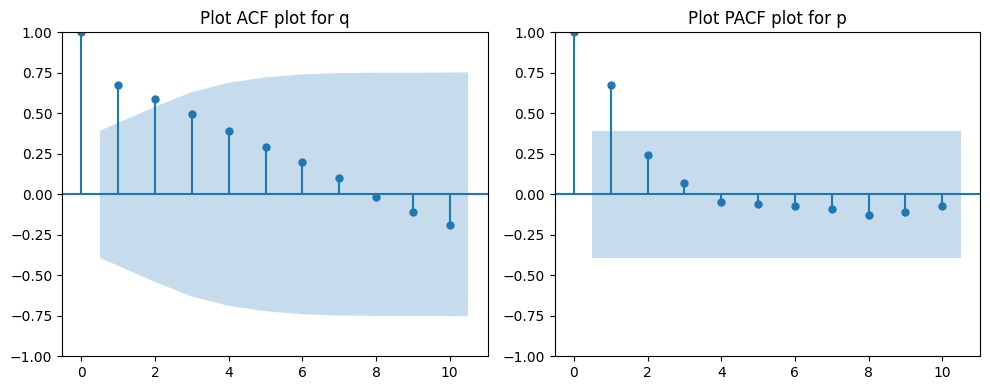

In [604]:
plot_acf_pacfchart(economic_data['GDP at 2010 Constant Basic Prices'])

In [587]:
train_data , test_data = economic_data['GDP at 2010 Constant Basic Prices'][:train_data_size],economic_data['GDP at 2010 Constant Basic Prices'][train_data_size:]

In [588]:
arima_model = ARIMA(train_data,order=(1,2,2))

In [589]:
arima_model_fit = arima_model.fit()

In [590]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     GDP at 2010 Constant Basic Prices   No. Observations:                   20
Model:                                ARIMA(1, 2, 2)   Log Likelihood                -149.805
Date:                               Wed, 28 May 2025   AIC                            307.609
Time:                                       15:37:21   BIC                            311.171
Sample:                                   01-01-1999   HQIC                           308.101
                                        - 01-01-2018                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4858      0.189     -2.574      0.010      -0.856      -0.116
ma.L1          0.5285      0.372      1.420      0.155      -0.201       1.258
ma.L2         -0.4680      0.229     -2.046      0.041      -0.916      -0.020
sigma2       6.85e+05   4.76e-07   1.44e+12      0.000    6.85e+05    6.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 5.21
Prob(Q):                              0.59   Prob(JB):                         0.07
Heteroskedasticity (H):              12.13   Skew:                            -1.22
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.47e+27. Standard errors may be unstable.
"""

In [591]:
test_pred = arima_model_fit.forecast(steps=len(test_data))

In [592]:
root_mean_squared_error(test_data,test_pred)

25201.33924141577

In [593]:
complete_arima_model= ARIMA(economic_data['GDP at 2010 Constant Basic Prices'],order=(1,2,2))
complete_arima_model_fit = complete_arima_model.fit()

In [594]:
forecast = complete_arima_model_fit.forecast(steps=4)
fitted_values = complete_arima_model_fit.fittedvalues

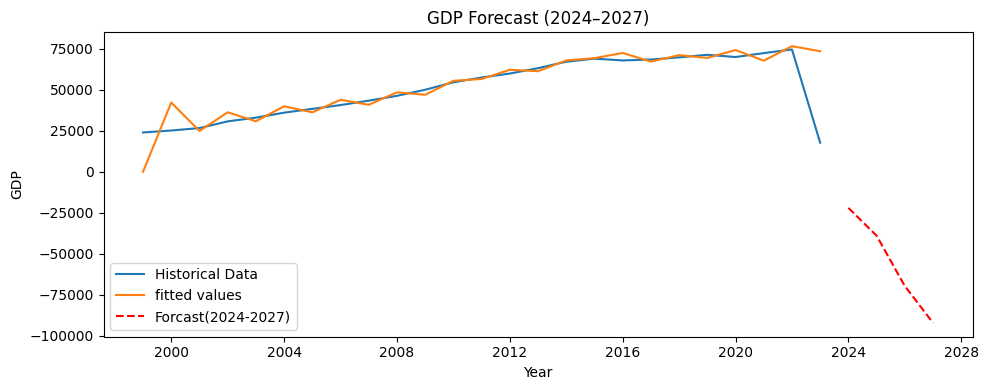

In [595]:
plt.figure(figsize=(10,4))
plt.plot(economic_data.index,economic_data['GDP at 2010 Constant Basic Prices'], label='Historical Data')
plt.plot(fitted_values.index,fitted_values.values,label=['fitted values'])
plt.plot(forecast.index, forecast.values, label='Forcast(2024-2027)',color='red',ls ='--')

plt.title('GDP Forecast (2024–2027)')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

In [596]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     GDP at 2010 Constant Basic Prices   No. Observations:                   20
Model:                                ARIMA(1, 2, 2)   Log Likelihood                -149.805
Date:                               Wed, 28 May 2025   AIC                            307.609
Time:                                       15:37:22   BIC                            311.171
Sample:                                   01-01-1999   HQIC                           308.101
                                        - 01-01-2018                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4858      0.189     -2.574      0.010      -0.856      -0.116
ma.L1          0.5285      0.372      1.420      0.155      -0.201       1.258
ma.L2         -0.4680      0.229     -2.046      0.041      -0.916      -0.020
sigma2       6.85e+05   4.76e-07   1.44e+12      0.000    6.85e+05    6.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 5.21
Prob(Q):                              0.59   Prob(JB):                         0.07
Heteroskedasticity (H):              12.13   Skew:                            -1.22
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.47e+27. Standard errors may be unstable.
"""